# TP n°4 de Bases de Données
## Accès aux données avec Python et construction d’un schéma en étoile

### Interagir avec une base SQLite depuis le langage Python

##### Importation des librairies

In [1]:
import sqlite3
import pandas as pd

### Question 1 :
#### Connexion : à la base "TP_python_sqlite.db"

In [2]:
conn = sqlite3.connect("TP_python_sqlite.db")
conn

### Question 2 :
#### Affichage de la requête "select * from MAGASIN" avec les fonctions suivantes : 
- Fechtall()
- Fetchone()

#### Cas 1 : Avec fetchall()

In [3]:
cur = conn.cursor()
cur.execute("select * from MAGASIN")
results_fetch_all = cur.fetchall()
print(results_fetch_all)

[('Store No. 1', '999 Main Street', 'New York', 'New York', 'NY', 'Jones', 'Modern'), ('Store No. 2', '73 Main Street', 'Chicago', 'Cook', 'IL', 'Smith', 'Original'), ('Store No. 3', '1 Main Street', 'Atlanta', 'Fulton', 'GA', 'Davis', 'Compact'), ('Store No. 4', '575 Main Street', 'Los Angeles', 'Los Angeles', 'CA', 'Johnson', 'Modern'), ('Store No. 5', '123 Main Street', 'San Francisco', 'San Francisco', 'CA', 'Green', 'Original'), ('Store No. 6', '353 Main Street', 'Philadelphia', 'Philadelphia', 'PA', 'Brown', 'Compact'), ('Store No. 7', '839 Main Street', 'Pittsburgh', 'Allegheny', 'PA', 'White', 'Modern'), ('Store No. 8', '651 Main Street', 'New Orleans', 'Orleans', 'LA', 'Williams', 'Original'), ('Store No. 9', '912 Main Street', 'Seattle', 'King', 'WA', 'Stuber', 'Compact'), ('Store No. 10', '752 Main Street', 'Dallas', 'Dallas', 'TX', 'Merz', 'Modern'), ('Store No. 11', '55 Main Street', 'Cincinnati', 'Hamilton', 'OH', 'Erickson', 'Original'), ('Store No. 12', '546 Main Street

Avec fetchall() récupère toute la liste

#### Cas 2 : Avec fetchone()

In [4]:
line = cur.fetchone()
for line in cur.execute("select * from MAGASIN"):
    print(line)

('Store No. 1', '999 Main Street', 'New York', 'New York', 'NY', 'Jones', 'Modern')
('Store No. 2', '73 Main Street', 'Chicago', 'Cook', 'IL', 'Smith', 'Original')
('Store No. 3', '1 Main Street', 'Atlanta', 'Fulton', 'GA', 'Davis', 'Compact')
('Store No. 4', '575 Main Street', 'Los Angeles', 'Los Angeles', 'CA', 'Johnson', 'Modern')
('Store No. 5', '123 Main Street', 'San Francisco', 'San Francisco', 'CA', 'Green', 'Original')
('Store No. 6', '353 Main Street', 'Philadelphia', 'Philadelphia', 'PA', 'Brown', 'Compact')
('Store No. 7', '839 Main Street', 'Pittsburgh', 'Allegheny', 'PA', 'White', 'Modern')
('Store No. 8', '651 Main Street', 'New Orleans', 'Orleans', 'LA', 'Williams', 'Original')
('Store No. 9', '912 Main Street', 'Seattle', 'King', 'WA', 'Stuber', 'Compact')
('Store No. 10', '752 Main Street', 'Dallas', 'Dallas', 'TX', 'Merz', 'Modern')
('Store No. 11', '55 Main Street', 'Cincinnati', 'Hamilton', 'OH', 'Erickson', 'Original')
('Store No. 12', '546 Main Street', 'Minneapo

La fonction fetchone() récupère la ligne suivante

### Question 3 : 
#### Création d'un dataframe à partir du résultat de la requête "select * from MAGASIN"

In [5]:
df_etoile = pd.read_sql_query("select * from MAGASIN", conn)
df_etoile

,NOM,ADRESSE,VILLE,COMTE,ETAT,MANAGER,TYPE
0,Store No. 1,999 Main Street,New York,New York,NY,Jones,Modern
1,Store No. 2,73 Main Street,Chicago,Cook,IL,Smith,Original
2,Store No. 3,1 Main Street,Atlanta,Fulton,GA,Davis,Compact
3,Store No. 4,575 Main Street,Los Angeles,Los Angeles,CA,Johnson,Modern
4,Store No. 5,123 Main Street,San Francisco,San Francisco,CA,Green,Original
5,Store No. 6,353 Main Street,Philadelphia,Philadelphia,PA,Brown,Compact
6,Store No. 7,839 Main Street,Pittsburgh,Allegheny,PA,White,Modern
7,Store No. 8,651 Main Street,New Orleans,Orleans,LA,Williams,Original
8,Store No. 9,912 Main Street,Seattle,King,WA,Stuber,Compact
9,Store No. 10,752 Main Street,Dallas,Dallas,TX,Merz,Modern


### Question 4 : 
#### Création de la table "employe" avec les colonnes suivantes : 
- nom : TEXT (Primary key)
- age : INTEGER

In [6]:
def CreateTableEmployee():
    cur.execute('''
    CREATE TABLE EMPLOYE
    (nom TEXT PRIMARY KEY, Age INTEGER)
    ''')

CreateTableEmployee()

In [8]:
df_employe = pd.read_sql_query("select * from EMPLOYE", conn)
df_employe

,nom,Age


### Question 5 : 
#### Insertion dans la table "employe" du n-uplet : "toto" et "25"

In [13]:
def AddEntry(nom,Age):
    cur.execute('''INSERT INTO EMPLOYE (nom,Age)
    VALUES (?,?)''',(nom,Age))

In [14]:
AddEntry('toto',25)

### Question 6 : 
#### On affiche le contenu de la table EMPLOYE

In [15]:
df_employe1 = pd.read_sql_query("select * from EMPLOYE", conn)
df_employe1

,nom,Age
0,toto,25


#### A ce stade, l'insertion n'est pas encore visible dans la base de données. En effet en ouvrant l'application DB Browser nous remarquons que le table EMPLOYE est vide. Il est nécéssaire rendre permanente la mise à jour.

### Question 7 : 
#### On rend permanent l'insertion du n-uplet grâce à la commande commit()

In [16]:
conn.commit()

## La mise à jour est visible depuis DB Browser

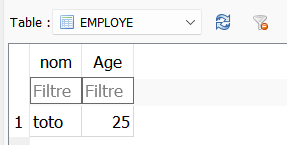

### Question 8 : 
#### Ecrire un programme qui demande à saisir un nom et un âge, et qui insère les informations saisies dans la table « employe » ; rendre permanente la mise à jour effectuée.

In [24]:
employe_nom = input("Veuillez saisir le nom de l'employé à insérer ")
print("Le nom de l'employé que vous avez saisi est : ", employe_nom)

Veuillez saisir le nom de l'employé à insérer Julien
Le nom de l'employé que vous avez saisi est :  Julien


In [25]:
employe_age = input("Veuillez saisir l'âge de l'employé à insérer ")
print("L'âge de l'employé que vous avez saisi est : ", employe_age)


Veuillez saisir l'âge de l'employé à insérer 25
L'âge de l'employé que vous avez saisi est :  25


In [26]:
AddEntry(employe_nom,employe_age)
conn.commit()

In [27]:
df_employe2 = pd.read_sql_query("select * from EMPLOYE", conn)
df_employe2

,nom,Age
0,toto,25
1,Julien,25


### Sur DB Viewer on obtient

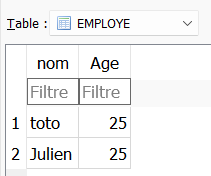

### Question 9 : 
#### Ecrire un programme qui demande à saisir un état et qui exécute la requête retrouvant tous les magasins situés dans cet état (requête SELECT paramétrée sur la table MAGASIN).

In [38]:
etat_magasin = input("Veuillez saisir l'état pour lequel vous voulez afficher tous les magasins ")
print("L'état que vous avez saisi est : ", etat_magasin)
print("\n")
print("---- RESULTAT ---- \n")
def select_magasin_by_specific_etat(etat_magasin):
    cur.execute('''select * from MAGASIN where ETAT=?
    ''',(etat_magasin,))
    
select_magasin_by_specific_etat("CA")

result_etat_magasin = cur.fetchall()
print(result_etat_magasin)

Veuillez saisir l'état pour lequel vous voulez afficher tous les magasins PA
L'état que vous avez saisi est :  PA


---- RESULTAT ---- 

[('Store No. 4', '575 Main Street', 'Los Angeles', 'Los Angeles', 'CA', 'Johnson', 'Modern'), ('Store No. 5', '123 Main Street', 'San Francisco', 'San Francisco', 'CA', 'Green', 'Original')]
